## import basic packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
# import warnings
# warnings.filterwarnings("ignore")

# Understanding the dataset

## read the dataset

In [2]:
filename = '../datasets/heart.csv'
df = pd.read_csv(filename)

## Features

- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type

> Value 1: typical angina 

> Value 2: atypical angina

> Value 3: non-anginal pain

> Value 4: asymptomatic

> trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

>Value 0: normal

>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attack

In [3]:
print("number of missing values per feature",df.isnull().sum())

number of missing values per feature age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [4]:
#Check if there is a duplicate row 
print("number of duplicate row: ",df.duplicated().sum())

number of duplicate row:  1


In [5]:
#remove duplicates 
df=df.drop_duplicates(keep="first")

In [6]:
print("length of the dataset : ", df.shape[0])
print("number of features : ", df.shape[1])

length of the dataset :  302
number of features :  14


In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
categorial_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_features = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", categorial_features)
print("The continuous cols are : ", continuous_features)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [9]:
#get the data distribution of the categorical features 
df[continuous_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


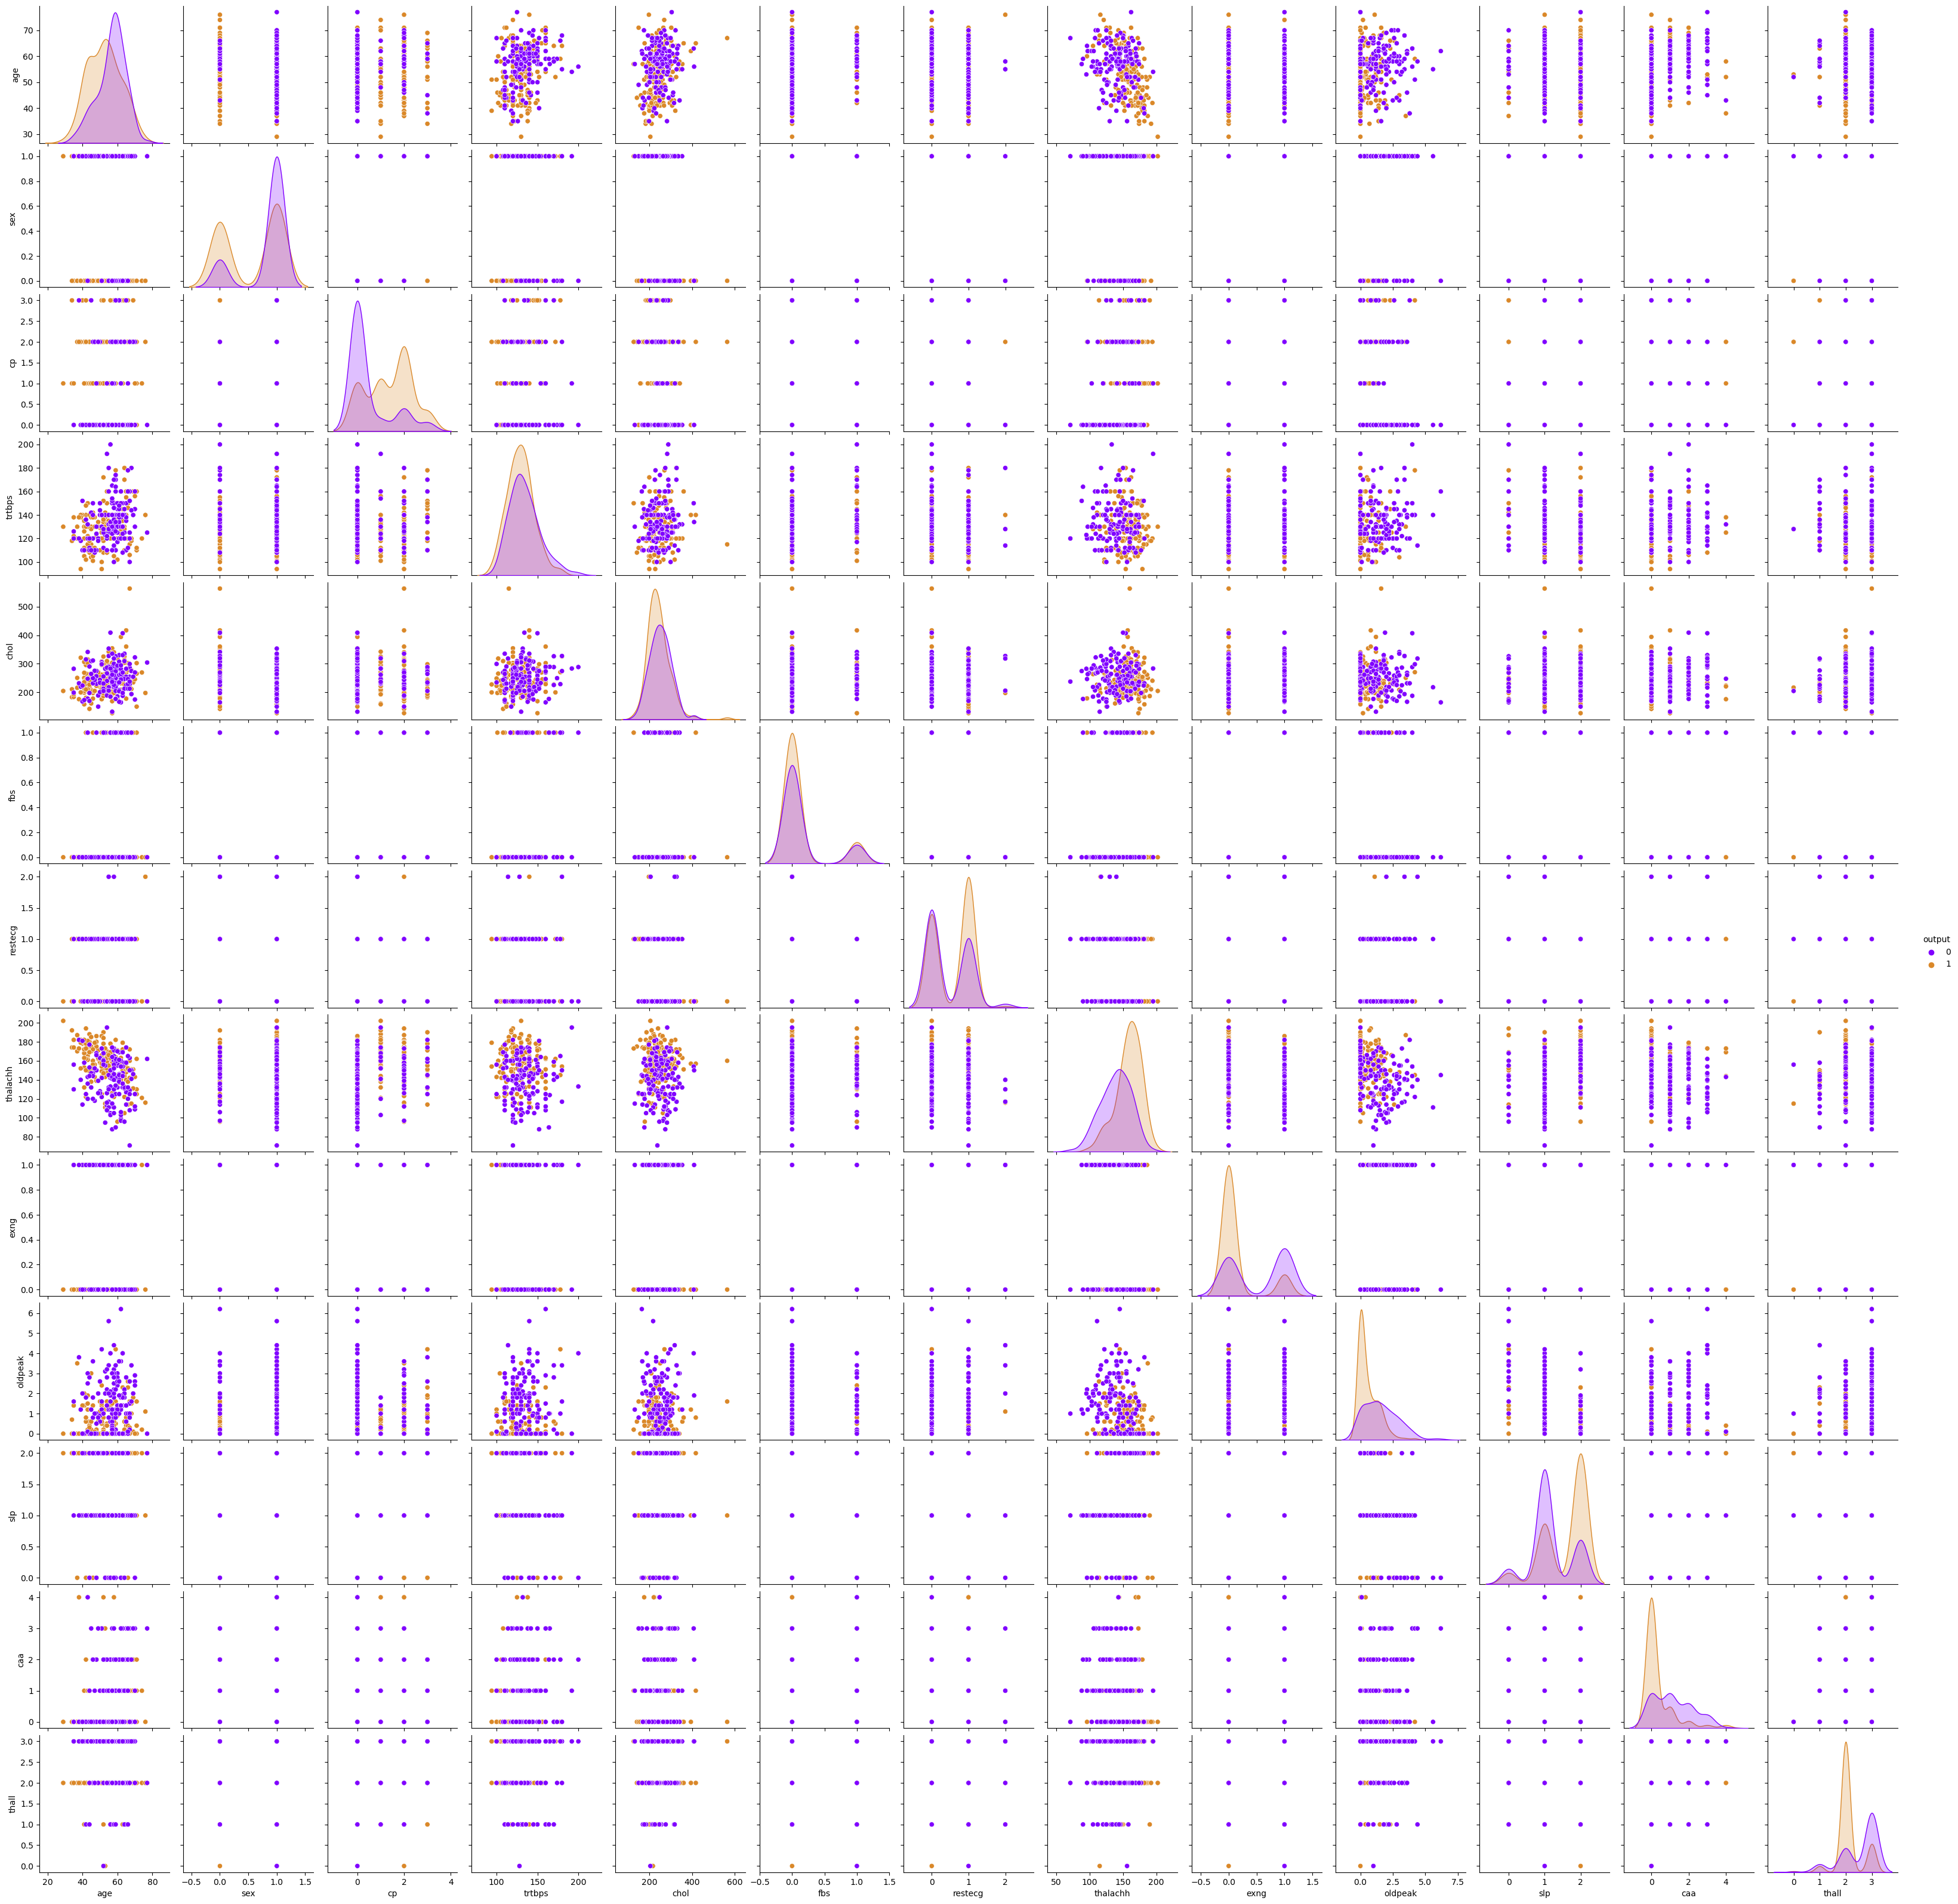

In [10]:
sns.pairplot(df,hue='output',palette = ["#8000ff","#da8829"])
plt.show()

In [12]:
df_corr = df.corr().transpose()

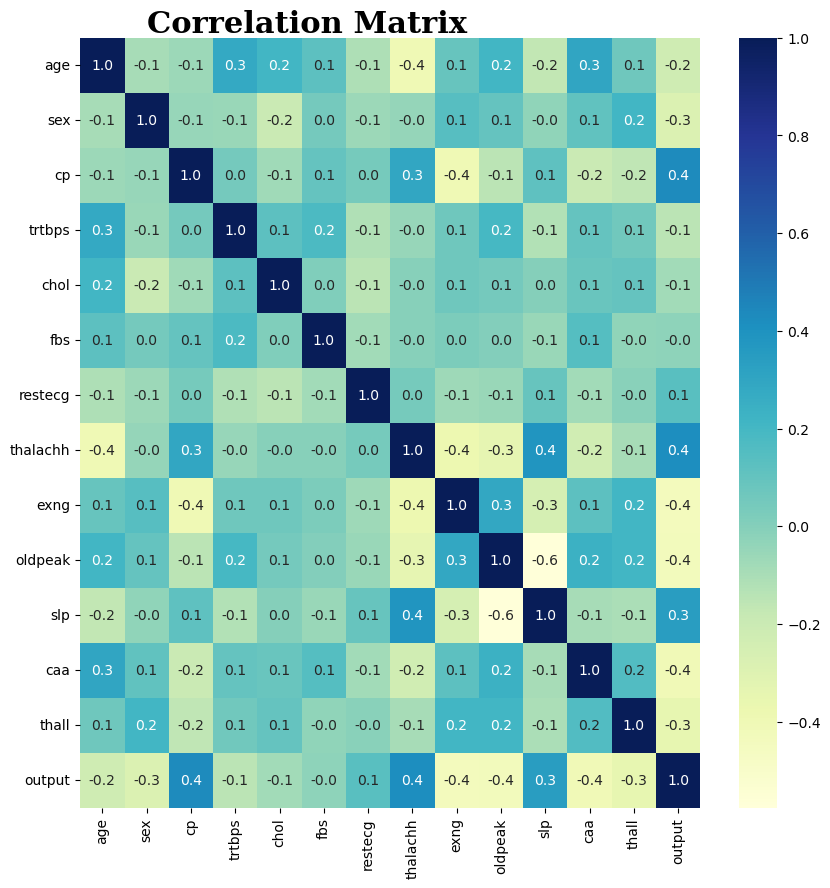

In [13]:

fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
# mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

In [14]:
df_corr_output = df_corr.iloc[:,-1]
print("correlations between features and hear attach: ",df_corr_output)

correlations between features and hear attach:  age        -0.221476
sex        -0.283609
cp          0.432080
trtbps     -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalachh    0.419955
exng       -0.435601
oldpeak    -0.429146
slp         0.343940
caa        -0.408992
thall      -0.343101
output      1.000000
Name: output, dtype: float64


In [15]:
df_corr[['output']].transpose()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
output,-0.221476,-0.283609,0.43208,-0.146269,-0.081437,-0.026826,0.134874,0.419955,-0.435601,-0.429146,0.34394,-0.408992,-0.343101,1.0


<AxesSubplot:>

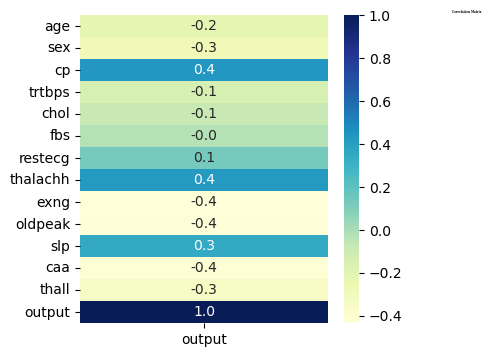

In [16]:
fig = plt.figure(figsize=(4,4))
# gs = fig.add_gridspec(1,1)
# gs.update(wspace=0.3, hspace=0.1)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
# mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=2, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr[['output']],fmt=".1f",annot=True,cmap='YlGnBu')

In [17]:
# x_pos = np.arange(len(df_corr_output.index[:-1]))
# labels = df_corr_output.index[:-1]
# # Build the plot
# fig, ax = plt.subplots(figsize=(12,5))

# ax.bar(x_pos, df_corr_output.values[:-1], align='center', alpha=0.8)
# ax.set_ylabel('correlation')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(labels)
# ax.set_title('correlations of features to heart attack')
# ax.yaxis.grid(True)
# # plt.grid()

# # Save the figure and show
# # plt.tight_layout()
# # plt.savefig('bar_plot.png')
# plt.show()

# preprocessing: preparing the data

In [18]:
# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [19]:
# creating a copy of df
df1_copy = df

# define the columns to be encoded and scaled (defined before)
categorial_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_features = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns (one hot encoding)
df1_copy = pd.get_dummies(df1_copy, columns = categorial_features, drop_first = True)

# seperate features with target
X = df1_copy.drop(['output'],axis=1)
y = df1_copy[['output']]

# instantiating the scaler
scaler = RobustScaler()
# scaler = StandardScaler()

# scaling the continuous featuree
X[continuous_features] = scaler.fit_transform(X[continuous_features])


In [20]:
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.576923,0.75,-0.117647,-0.076336,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.423077,0.00,0.149020,1.053435,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.115385,0.00,-0.572549,0.595420,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.038462,-0.50,-0.070588,0.778626,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.115385,-0.50,1.780392,0.320611,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [21]:
#separate data for testing and training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (241, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (241, 1)
The shape of y_test is        (61, 1)


In [22]:
y_train.squeeze(1).shape

(241,)

## Neural networks

In [94]:
# param_grid = [
#         {
#             'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#             'solver' : ['lbfgs', 'sgd', 'adam'],
#             'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ],
#             'hidden_layer_sizes': [(10,),(30,),(100,),(200,),(5,5),(5,10),(10,20),(20,30),(30,40),(40,50),(100,100),(200,200),(100,100,100)],
#             'alpha': 10.0 ** -np.arange(1, 5),
#             'random_state':[102,7,88,91]
#         }
#        ]
# clf = GridSearchCV(MLPClassifier(), param_grid, cv=6,
#                            scoring='accuracy',n_jobs=-1)
# # clf = MLPClassifier(solver='adam', learning_rate_init=1e-3,hidden_layer_sizes=(50, ), random_state=102)
# clf.fit(X_train,y_train.squeeze(1))

# print("Best parameters set found on development set:")
# print(clf.best_params_)


In [56]:
clf.best_score_

0.8591463414634147

The test accuracy score of Neural Net is  0.8852459016393442
0.8177595628415301
0.8666666666666667
0.04124651555631506


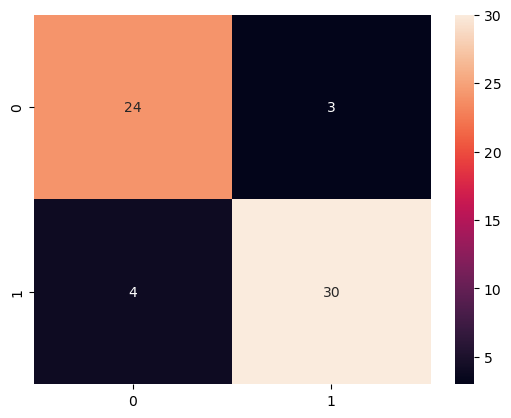

In [162]:
clf2 = MLPClassifier(solver='adam', alpha=0.1,learning_rate_init=1e-3,hidden_layer_sizes=(200,200 ),activation='relu', random_state=7,max_iter=1000)
clf2.fit(X_train,y_train.squeeze(1))
# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Neural Net is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(clf2,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result.mean())
print(cv_result.max())
print(cv_result.std())

In [55]:
test_acc_ann = []
train_acc_ann = []
samples = list(np.arange(1,len(X_train),5))
if samples[-1]!=len(X_train):
    samples.append(len(X_train))
for num_samples in samples:
    clf2 = MLPClassifier(solver='adam', alpha=0.1,learning_rate_init=1e-3,hidden_layer_sizes=(200,200 ),activation='relu', random_state=7,max_iter=1000)

    clf2.fit(X_train[:num_samples],y_train[:num_samples].squeeze(1))
    # predicting the values
    y_pred_train = clf2.predict(X_train[:num_samples])
    y_pred = clf2.predict(X_test)
    # printing the test accuracy
    accuracy_train = accuracy_score(y_train[:num_samples], y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    train_acc_ann.append(round(100*accuracy_train,0))
    test_acc_ann.append(round(100*accuracy_test,0))

print("samples used: ",samples)
print("The train accuracies score of Neural Net is ", train_acc_ann)
print("The test accuracies score of Neural Net is ", test_acc_ann)

samples used:  [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241]
The train accuracies score of Neural Net is  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 83.0, 96.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
The test accuracies score of Neural Net is  [56.0, 64.0, 84.0, 82.0, 82.0, 79.0, 74.0, 75.0, 75.0, 74.0, 79.0, 75.0, 79.0, 74.0, 80.0, 77.0, 79.0, 80.0, 84.0, 85.0, 84.0, 85.0, 84.0, 85.0, 84.0, 85.0, 84.0, 87.0, 87.0, 82.0, 82.0, 80.0, 84.0, 80.0, 79.0, 80.0, 80.0, 80.0, 82.0, 82.0, 85.0, 82.0, 84.0, 84.0, 82.0, 85.0, 82.0, 80.0, 82.0]


In [56]:
# Change the style of plot
plt.style.use('seaborn-darkgrid')

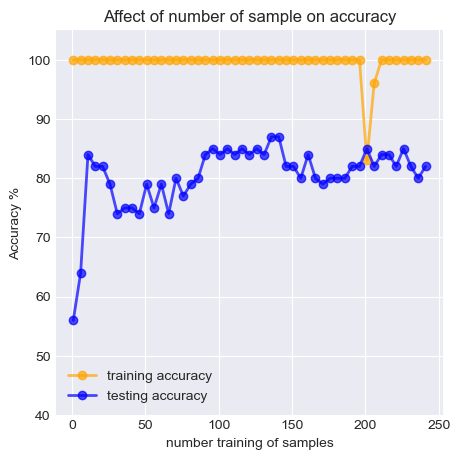

In [57]:

plt.figure(figsize=(5,5))
plt.title("Affect of number of sample on accuracy")
ax = plt.gca()
ax.set_ylim([40, 105])
plt.plot(samples,train_acc_ann,label='training accuracy',marker='o', color='orange', linewidth=2, alpha=0.7)
plt.plot(samples,test_acc_ann,label='testing accuracy',color='blue',marker='o', linewidth=2, alpha=0.7)
plt.legend(loc='best')
plt.xlabel('number training of samples')
plt.ylabel('Accuracy %')
plt.show()

In [226]:
iterations = list(np.arange(1,500,10))
mlp_train, mlp_test = np.zeros(len(iterations)), np.zeros(len(iterations))
count = 0
for i in iterations:
    clf2 = MLPClassifier(solver='adam', alpha=0.1,learning_rate_init=1e-3,hidden_layer_sizes=(200,200 ),activation='relu', random_state=7,max_iter=i)
    clf2 = clf2.fit(X_train, y_train)
    mlp_train[count] = clf2.score(X_train, y_train)*100
    mlp_test[count] =  clf2.score(X_test,y_test)*100
    count += 1

# plt.savefig(outputFolder + dataSet + " Score vs. Epochs.png")
# plt.clf()
# plt.close()

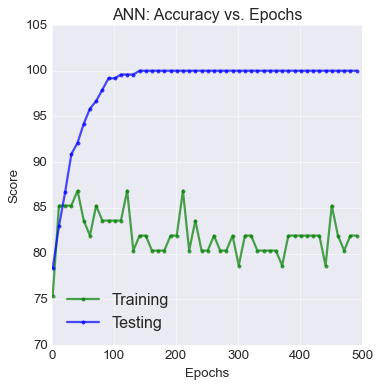

In [233]:
plt.figure(figsize=(5,5))
plt.plot(iterations, mlp_test, marker='.', color='green', linewidth=2, alpha=0.7, label="Training")
plt.plot(iterations, mlp_train, marker='.', color='blue', linewidth=2, alpha=0.7, label="Testing")
plt.legend(loc='best')
ax = plt.gca()
ax.set_ylim([70, 105])
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("ANN: Accuracy vs. Epochs")
plt.show()

In [261]:
lrs = list(10.0 ** -np.arange(1, 6))
lrs.reverse()
slovers = ['lbfgs', 'sgd', 'adam']
mlp_test_lr = np.zeros((len(slovers),len(lrs)))

for i,solver in enumerate(slovers):
    for j, lr in enumerate(lrs):
        clf2 = MLPClassifier(solver=solver, alpha=0.1,learning_rate_init=lr,hidden_layer_sizes=(200,200 ),activation='relu', random_state=7,max_iter=300)
        clf2 = clf2.fit(X_train, y_train)
        mlp_test_lr[i,j] =  clf2.score(X_test,y_test)*100


/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [262]:
mlp_test_lr

array([[80.32786885, 80.32786885, 80.32786885, 80.32786885, 80.32786885],
       [27.86885246, 80.32786885, 85.24590164, 83.60655738, 77.04918033],
       [85.24590164, 85.24590164, 78.68852459, 85.24590164, 83.60655738]])

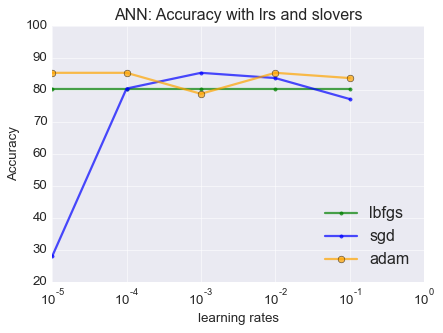

In [265]:
plt.figure(figsize=(6,4))
plt.plot(lrs, mlp_test_lr[0], marker='.', color='green', linewidth=2, alpha=0.7, label="lbfgs")
plt.plot(lrs, mlp_test_lr[1], marker='.', color='blue', linewidth=2, alpha=0.7, label="sgd")
plt.plot(lrs, mlp_test_lr[2], marker='o', color='orange', linewidth=2, alpha=0.7, label="adam")
plt.legend(loc='best')
ax = plt.gca()
ax.set_ylim([20, 100])
ax.set_xscale('log')
plt.xlabel("learning rates")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy with lrs and slovers")
plt.show()

## SVM

In [85]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear', 'poly', 'rbf'],
#              'degree':[1,2,3,5,6],
#               'random_state':[102,7,88,91]
#              } 
# grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=6,
#                            scoring='accuracy',n_jobs=-1)
  
# # fitting the model for grid search
# grid_svm.fit(X_train, y_train.squeeze(1))
# print("Best parameters set found on development set:")
# print(grid_svm.best_params_)

In [87]:
# grid_svm.best_score_

The test accuracy score of SVM is  0.819672131147541
number of patients that had heart attach cases in the test dataset:  34
number of patients that didn't had  cases in the test dataset:  27
[0.7704918  0.90163934 0.76666667 0.8        0.8       ]
0.80775956284153
0.9016393442622951
0.04901295136893062


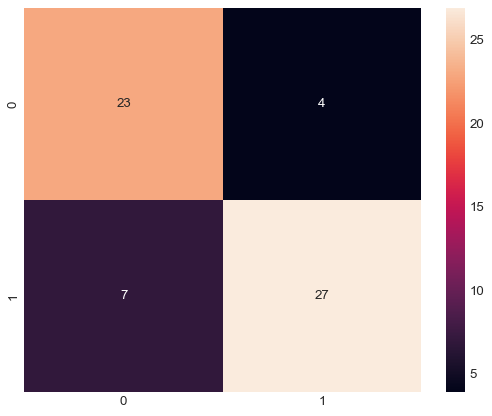

In [286]:
svm =SVC(C=0.1,degree=1,gamma=0.1, kernel="linear",random_state=102)
svm.fit(X_train,y_train.squeeze(1))
# predicting the values
y_pred = svm.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(svm,X,y.squeeze(1),cv=5) # uses R^2 as score 
print(cv_result)
print(cv_result.mean())
print(cv_result.max())
print(cv_result.std())

In [54]:
test_acc_svm = []
train_acc_svm = []
samples = list(np.arange(4,len(X_train),5))
if samples[-1]!=len(X_train):
    samples.append(len(X_train))
for num_samples in samples:
    svm =SVC(C=0.1,gamma=0.1, kernel="linear",random_state=102)

    svm.fit(X_train[:num_samples],y_train[:num_samples].squeeze(1))
    # predicting the values
    y_pred_train = svm.predict(X_train[:num_samples])
    y_pred = svm.predict(X_test)
    # printing the test accuracy
    accuracy_train = accuracy_score(y_train[:num_samples], y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    train_acc_svm.append(round(100*accuracy_train,0))
    test_acc_svm.append(round(100*accuracy_test,0))

print("samples used: ",samples)
print("The train accuracies score of Neural Net is ", train_acc_svm)
print("The test accuracies score of Neural Net is ", test_acc_svm)

samples used:  [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 209, 214, 219, 224, 229, 234, 239, 241]
The train accuracies score of Neural Net is  [75.0, 78.0, 79.0, 84.0, 83.0, 90.0, 88.0, 82.0, 80.0, 84.0, 87.0, 86.0, 81.0, 83.0, 81.0, 81.0, 79.0, 80.0, 81.0, 81.0, 83.0, 83.0, 84.0, 83.0, 84.0, 84.0, 83.0, 85.0, 84.0, 84.0, 84.0, 84.0, 84.0, 85.0, 85.0, 84.0, 84.0, 86.0, 84.0, 83.0, 84.0, 84.0, 84.0, 84.0, 84.0, 85.0, 84.0, 83.0, 83.0]
The test accuracies score of Neural Net is  [56.0, 84.0, 80.0, 79.0, 85.0, 82.0, 84.0, 85.0, 85.0, 85.0, 82.0, 84.0, 87.0, 87.0, 90.0, 90.0, 92.0, 92.0, 89.0, 87.0, 87.0, 89.0, 87.0, 87.0, 87.0, 89.0, 89.0, 89.0, 87.0, 89.0, 89.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 85.0, 85.0, 82.0, 82.0, 82.0, 82.0, 82.0, 84.0, 84.0, 82.0, 82.0]


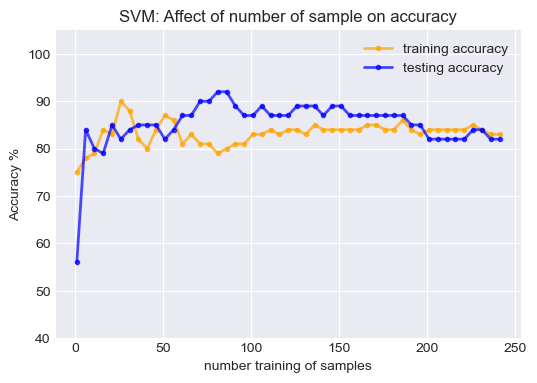

In [59]:
plt.figure(figsize=(6,4))
plt.title("SVM: Affect of number of sample on accuracy")
ax = plt.gca()
ax.set_ylim([40, 105])
plt.plot(samples,train_acc_svm,label='training accuracy',marker='.', color='orange', linewidth=2, alpha=0.7)
plt.plot(samples,test_acc_svm,label='testing accuracy',color='blue',marker='.', linewidth=2, alpha=0.7)
plt.legend(loc='best')
plt.xlabel('number training of samples')
plt.ylabel('Accuracy %')
plt.show()

In [287]:
test_acc_svm_c = []
train_acc_svm_c = []
Cs = [0.001,0.01,0.1,1.0,10.0,100,1000]
for C in Cs:
    svm =SVC(C=C,degree=1,gamma=0.1, kernel="linear",random_state=102)

    svm.fit(X_train,y_train.squeeze(1))
    # predicting the values
    y_pred_train = svm.predict(X_train)
    y_pred = svm.predict(X_test)
    # printing the test accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    train_acc_svm_c.append(round(100*accuracy_train,0))
    test_acc_svm_c.append(round(100*accuracy_test,0))

print("samples used: ",Cs)
print("The train accuracies score of SVM is ", train_acc_svm_c)
print("The test accuracies score of SVM is ", test_acc_svm_c)

samples used:  [0.001, 0.01, 0.1, 1.0, 10.0, 100]
The train accuracies score of Neural Net is  [54.0, 80.0, 83.0, 86.0, 90.0, 89.0]
The test accuracies score of Neural Net is  [56.0, 85.0, 82.0, 87.0, 85.0, 84.0]


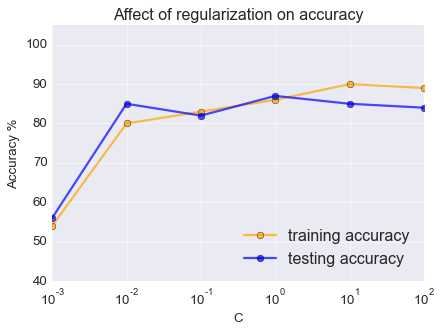

In [288]:
plt.figure(figsize=(6,4))
plt.title("Affect of regularization on accuracy")
ax = plt.gca()
ax.set_ylim([40, 105])
ax.set_xscale('log')
plt.plot(Cs,train_acc_svm_c,label='training accuracy',marker='o', color='orange', linewidth=2, alpha=0.7)
plt.plot(Cs,test_acc_svm_c,label='testing accuracy',color='blue',marker='o', linewidth=2, alpha=0.7)
plt.legend(loc='lower right')
plt.xlabel('C')
plt.ylabel('Accuracy %')
plt.show()

In [25]:
# test_acc_svm_dg = []
# train_acc_svm_dg = []
# degrees = list(np.arange(1,60,10))
# for degree in degrees:
#     svm =SVC(C=0.01,degree=degree,gamma='auto', kernel="poly",random_state=102)

#     svm.fit(X_train,y_train.squeeze(1))
#     # predicting the values
#     y_pred_train = svm.predict(X_train)
#     y_pred = svm.predict(X_test)
#     # printing the test accuracy
#     accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_test = accuracy_score(y_test, y_pred)
#     train_acc_svm_dg.append(round(100*accuracy_train,0))
#     test_acc_svm_dg.append(round(100*accuracy_test,0))

# print("samples used: ",degrees)
# print("The train accuracies score of SVM is ", train_acc_svm_dg)
# print("The test accuracies score of SVM  is ", test_acc_svm_dg)

samples used:  [1, 11, 21, 31, 41, 51]
The train accuracies score of SVM is  [54.0, 54.0, 54.0, 54.0, 54.0, 54.0]
The test accuracies score of SVM  is  [56.0, 56.0, 56.0, 56.0, 56.0, 56.0]


In [31]:
gammas = [0.001,0.01,0.1,1.0,10.0,100]
kernals = ['poly','sigmoid','rbf']
test_acc_svm_gamma = np.zeros((len(kernals),len(gammas)))
train_acc_svm_gamma = np.zeros((len(kernals),len(gammas)))
for i,kernal in enumerate(kernals):
    for j,gamma in enumerate(gammas):
        svm =SVC(C=0.01,gamma=gamma, kernel=kernal,random_state=102)

        svm.fit(X_train,y_train.squeeze(1))
        # predicting the values
        y_pred_train = svm.predict(X_train)
        y_pred = svm.predict(X_test)
        # printing the test accuracy
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred)
        train_acc_svm_gamma[i,j] = round(100*accuracy_train,0)
        test_acc_svm_gamma[i,j] =round(100*accuracy_test,0)

print("samples used: ",gammas)
print("The train accuracies score of SVM is ", train_acc_svm_gamma)
print("The test accuracies score of SVM  is ", test_acc_svm_gamma)

samples used:  [0.001, 0.01, 0.1, 1.0, 10.0, 100]
The train accuracies score of SVM is  [[ 54.  54.  54.  97. 100. 100.]
 [ 54.  54.  54.  59.  60.  59.]
 [ 54.  54.  54.  54.  54.  54.]]
The test accuracies score of SVM  is  [[56. 56. 56. 85. 77. 77.]
 [56. 56. 56. 67. 61. 61.]
 [56. 56. 56. 56. 56. 56.]]


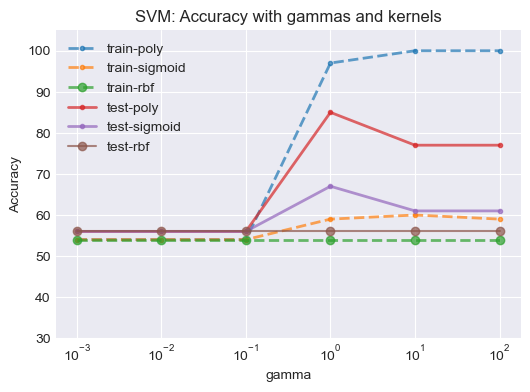

In [43]:
plt.figure(figsize=(6,4))
plt.plot(gammas, train_acc_svm_gamma[0], marker='.', linestyle='--',linewidth=2, alpha=0.7, label="train-poly")
plt.plot(gammas, train_acc_svm_gamma[1], marker='.' ,linestyle='--',linewidth=2, alpha=0.7, label="train-sigmoid")
plt.plot(gammas, train_acc_svm_gamma[2], marker='o',linestyle='--', linewidth=2, alpha=0.7, label="train-rbf")
plt.plot(gammas, test_acc_svm_gamma[0], marker='.',  linewidth=2, alpha=0.7, label="test-poly")
plt.plot(gammas, test_acc_svm_gamma[1], marker='.',  linewidth=2, alpha=0.7, label="test-sigmoid")
plt.plot(gammas, test_acc_svm_gamma[2], marker='o', alpha=0.7, label="test-rbf")
plt.legend(loc='best')
ax = plt.gca()
ax.set_ylim([30, 105])
ax.set_xscale('log')
plt.xlabel("gamma")
plt.ylabel("Accuracy")
plt.title("SVM: Accuracy with gammas and kernels")
plt.show()

##  Decision Tree

In [96]:
# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'ccp_alpha': [0.1, .01, .001],
#               'max_depth' : np.arange(2,20,2),
#               'criterion' :['gini', 'entropy'],
#               'random_state':[102,7,88,91]
#              }
# grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,cv=6,
#                            scoring='accuracy',n_jobs=-1)
  
# # fitting the model for grid search
# grid_dt.fit(X_train, y_train)

In [57]:
print("Best parameters set found on development set:")
print(grid_dt.best_params_)
print(grid_dt.best_score_)

Best parameters set found on development set:
{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'random_state': 102}
0.7841463414634147


1.79 µs ± 78.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
The train accuracy score of DT is  0.8340248962655602
The test accuracy score of DT is  0.7868852459016393
0.7247540983606557
0.8524590163934426
0.0750121373319744


/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

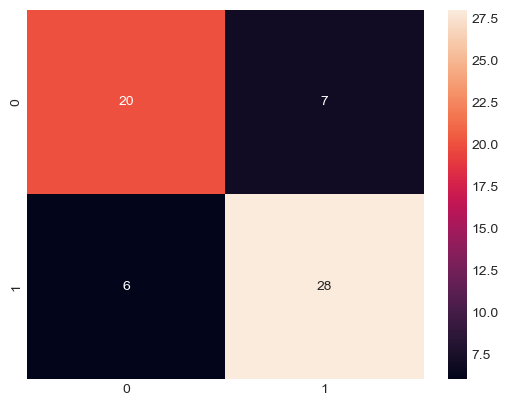

In [61]:

dt =DecisionTreeClassifier(ccp_alpha= 0.01, criterion='gini',max_depth=8,max_features='auto',random_state=102)
dt.fit(X_train,y_train)


# predicting the values
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
cv_result = cross_val_score(dt,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result.mean())
print(cv_result.max())
print(cv_result.std())

In [62]:
test_acc_dt = []
train_acc_dt = []
samples = list(np.arange(4,len(X_train),5))
if samples[-1]!=len(X_train):
    samples.append(len(X_train))
for num_samples in samples:
    dt =DecisionTreeClassifier(ccp_alpha= 0.01, criterion='gini',max_depth=8,max_features='auto',random_state=102)

    dt.fit(X_train[:num_samples],y_train[:num_samples].squeeze(1))
    # predicting the values
    y_pred_train = dt.predict(X_train[:num_samples])
    y_pred = dt.predict(X_test)
    # printing the test accuracy
    accuracy_train = accuracy_score(y_train[:num_samples], y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    train_acc_dt.append(round(100*accuracy_train,0))
    test_acc_dt.append(round(100*accuracy_test,0))

print("samples used: ",samples)
print("The train accuracies score of Neural Net is ", train_acc_dt)
print("The test accuracies score of Neural Net is ", test_acc_dt)

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

samples used:  [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 209, 214, 219, 224, 229, 234, 239, 241]
The train accuracies score of Neural Net is  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 98.0, 100.0, 98.0, 91.0, 95.0, 96.0, 98.0, 94.0, 95.0, 92.0, 89.0, 89.0, 89.0, 90.0, 86.0, 88.0, 87.0, 83.0, 87.0, 83.0, 82.0, 82.0, 88.0, 86.0, 83.0, 82.0, 86.0, 81.0, 85.0, 85.0, 84.0, 83.0, 82.0, 84.0, 88.0, 85.0, 83.0, 83.0, 83.0]
The test accuracies score of Neural Net is  [49.0, 79.0, 75.0, 70.0, 69.0, 69.0, 67.0, 69.0, 70.0, 74.0, 61.0, 66.0, 70.0, 66.0, 70.0, 61.0, 69.0, 66.0, 70.0, 75.0, 75.0, 82.0, 82.0, 84.0, 75.0, 77.0, 80.0, 84.0, 70.0, 79.0, 80.0, 77.0, 74.0, 82.0, 77.0, 80.0, 85.0, 75.0, 84.0, 74.0, 74.0, 79.0, 79.0, 75.0, 85.0, 82.0, 79.0, 75.0, 79.0]


/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

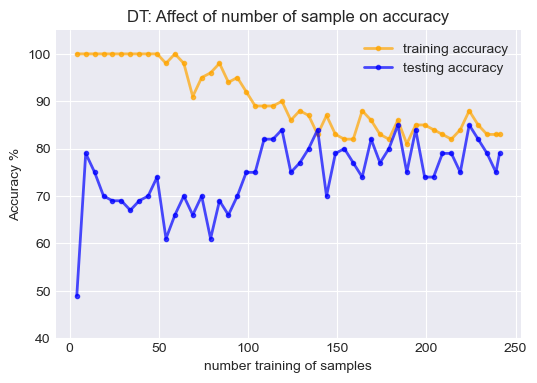

In [63]:
plt.figure(figsize=(6,4))
plt.title("DT: Affect of number of sample on accuracy")
ax = plt.gca()
ax.set_ylim([40, 105])
plt.plot(samples,train_acc_dt,label='training accuracy',marker='.', color='orange', linewidth=2, alpha=0.7)
plt.plot(samples,test_acc_dt,label='testing accuracy',color='blue',marker='.', linewidth=2, alpha=0.7)
plt.legend(loc='best')
plt.xlabel('number training of samples')
plt.ylabel('Accuracy %')
plt.show()

## Boosing

In [143]:
# param_grid = {'learning_rate': [0.1,0.5,1.0,3.0,10.0],
#               'n_estimators': [5, 10, 15,20,35,50,100],
#               'random_state':[102,7,88,91]
#              } 
# grid_boosting = GridSearchCV( AdaBoostClassifier(), param_grid, refit = True, verbose = 3,cv=5,
#                            scoring='accuracy',n_jobs=-1)
  
# # fitting the model for grid search
# grid_boosting.fit(X_train, y_train)
# print("Best parameters set found on development set:")
# print(grid_boosting.best_params_)

In [104]:
print(grid_boosting.best_params_)
grid_boosting.best_score_

{'learning_rate': 1.0, 'n_estimators': 20, 'random_state': 102}


0.8051020408163266

The train accuracy score of DT is  0.9004149377593361
The test accuracy score of DT is  0.8852459016393442
0.8176502732240438
0.03737305446329466


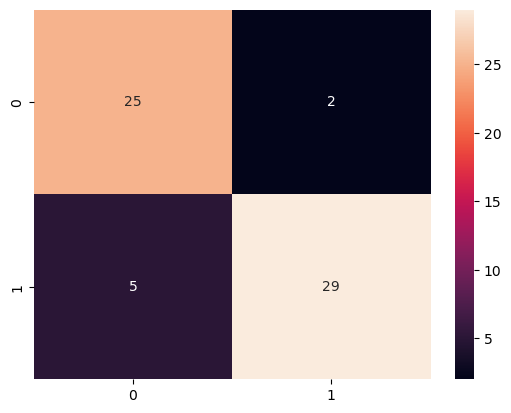

In [151]:
adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=25, random_state=102)

adabost.fit(X_train,y_train.squeeze(1))


# predicting the values
y_pred = adabost.predict(X_test)
y_pred_train = adabost.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(adabost,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result.mean())
print(cv_result.max())
print(cv_result.std())

In [64]:
test_acc_boost = []
train_acc_boost = []
samples = list(np.arange(4,len(X_train),5))
if samples[-1]!=len(X_train):
    samples.append(len(X_train))
for num_samples in samples:
    adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=25, random_state=102)

    adabost.fit(X_train[:num_samples],y_train[:num_samples].squeeze(1))
    # predicting the values
    y_pred_train = adabost.predict(X_train[:num_samples])
    y_pred = adabost.predict(X_test)
    # printing the test accuracy
    accuracy_train = accuracy_score(y_train[:num_samples], y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    train_acc_boost.append(round(100*accuracy_train,0))
    test_acc_boost.append(round(100*accuracy_test,0))

print("samples used: ",samples)
print("The train accuracies score of Neural Net is ", train_acc_boost)
print("The test accuracies score of Neural Net is ", test_acc_boost)

samples used:  [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 209, 214, 219, 224, 229, 234, 239, 241]
The train accuracies score of Neural Net is  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 98.0, 99.0, 96.0, 96.0, 96.0, 93.0, 95.0, 92.0, 91.0, 94.0, 91.0, 92.0, 91.0, 93.0, 87.0, 90.0, 92.0, 89.0, 88.0, 89.0, 90.0, 91.0, 92.0, 88.0, 90.0, 89.0, 90.0, 88.0, 87.0, 89.0, 90.0, 89.0, 90.0, 89.0, 88.0, 90.0, 90.0]
The test accuracies score of Neural Net is  [49.0, 79.0, 70.0, 70.0, 77.0, 75.0, 67.0, 77.0, 77.0, 77.0, 80.0, 74.0, 75.0, 79.0, 85.0, 74.0, 79.0, 85.0, 80.0, 85.0, 85.0, 82.0, 85.0, 89.0, 87.0, 84.0, 84.0, 82.0, 87.0, 84.0, 85.0, 85.0, 90.0, 85.0, 84.0, 85.0, 79.0, 84.0, 85.0, 82.0, 82.0, 84.0, 84.0, 84.0, 85.0, 87.0, 87.0, 89.0, 89.0]


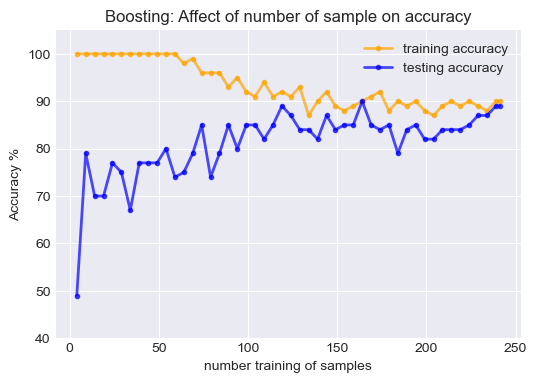

In [65]:
plt.figure(figsize=(6,4))
plt.title("Boosting: Affect of number of sample on accuracy")
ax = plt.gca()
ax.set_ylim([40, 105])
plt.plot(samples,train_acc_boost,label='training accuracy',marker='.', color='orange', linewidth=2, alpha=0.7)
plt.plot(samples,test_acc_boost,label='testing accuracy',color='blue',marker='.', linewidth=2, alpha=0.7)
plt.legend(loc='best')
plt.xlabel('number training of samples')
plt.ylabel('Accuracy %')
plt.show()

## KNN

In [114]:
# param_grid = {'n_neighbors': np.arange(1,20),
#               'weights': ['uniform','distance'],
#               'algorithm':['auto','ball_tree','kd_tree','brute'],
#               'leaf_size':[5,10,15,20,30,50,100]
#              } 
# grid_knn = GridSearchCV( KNeighborsClassifier(), param_grid, refit = True, verbose = 3,cv=6,
#                            scoring='accuracy',n_jobs=-1)
  
# # fitting the model for grid search
# grid_knn.fit(X_train, y_train.squeeze(1))
# print("Best parameters set found on development set:")
# print(grid_knn.best_params_)

In [113]:
print(grid_knn.best_params_)
grid_knn.best_score_

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 11, 'weights': 'uniform'}


0.8216463414634146

The train accuracy score of DT is  0.8215767634854771
The test accuracy score of DT is  0.8688524590163934
0.8110928961748634
0.8110928961748634
0.03169756904597586


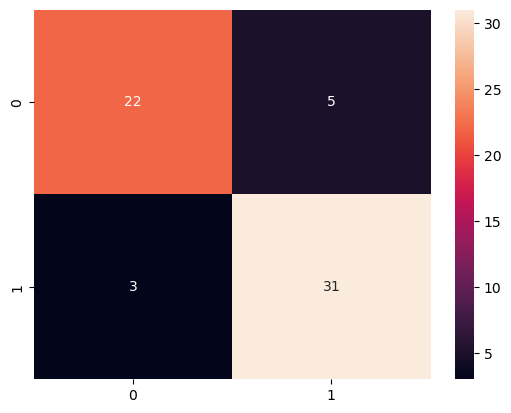

In [152]:
knn = KNeighborsClassifier(algorithm='auto',leaf_size=5,n_neighbors=7,weights='uniform')
# knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 5, n_neighbors= 4, weights= 'distance')

knn.fit(X_train,y_train.squeeze(1))
# predicting the values
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(knn,X,y.squeeze(1),cv=5) # uses R^2 as score 
print(cv_result.mean())
print(cv_result.mean())
print(cv_result.std())

In [68]:
test_acc_knn = []
train_acc_knn = []
samples = list(np.arange(7,len(X_train),5))
if samples[-1]!=len(X_train):
    samples.append(len(X_train))
for num_samples in samples:
    knn = KNeighborsClassifier(algorithm='auto',leaf_size=5,n_neighbors=7,weights='uniform')

    knn.fit(X_train[:num_samples],y_train[:num_samples].squeeze(1))
    # predicting the values
    y_pred_train = knn.predict(X_train[:num_samples])
    y_pred = knn.predict(X_test)
    # printing the test accuracy
    accuracy_train = accuracy_score(y_train[:num_samples], y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    train_acc_knn.append(round(100*accuracy_train,0))
    test_acc_knn.append(round(100*accuracy_test,0))

print("samples used: ",samples)
print("The train accuracies score of Neural Net is ", train_acc_knn)
print("The test accuracies score of Neural Net is ", test_acc_knn)

samples used:  [7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97, 102, 107, 112, 117, 122, 127, 132, 137, 142, 147, 152, 157, 162, 167, 172, 177, 182, 187, 192, 197, 202, 207, 212, 217, 222, 227, 232, 237, 241]
The train accuracies score of Neural Net is  [57.0, 67.0, 71.0, 73.0, 74.0, 69.0, 73.0, 76.0, 77.0, 79.0, 79.0, 81.0, 79.0, 79.0, 82.0, 78.0, 77.0, 80.0, 78.0, 79.0, 79.0, 79.0, 79.0, 80.0, 79.0, 80.0, 80.0, 82.0, 82.0, 83.0, 83.0, 83.0, 84.0, 83.0, 82.0, 82.0, 83.0, 84.0, 84.0, 83.0, 83.0, 84.0, 84.0, 85.0, 84.0, 84.0, 82.0, 83.0]
The test accuracies score of Neural Net is  [44.0, 64.0, 79.0, 75.0, 77.0, 82.0, 84.0, 84.0, 85.0, 85.0, 87.0, 87.0, 87.0, 82.0, 82.0, 80.0, 80.0, 79.0, 80.0, 84.0, 85.0, 84.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 84.0, 84.0, 85.0, 84.0, 84.0, 84.0, 87.0, 87.0, 87.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0]


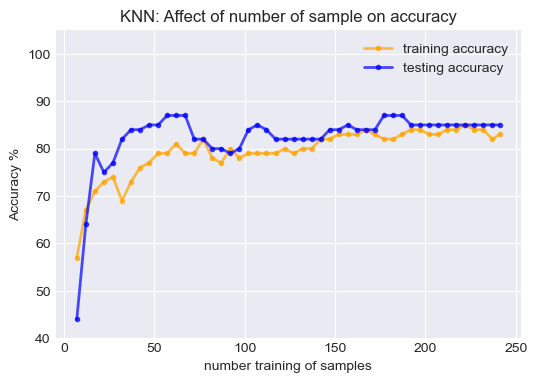

In [69]:
plt.figure(figsize=(6,4))
plt.title("KNN: Affect of number of sample on accuracy")
ax = plt.gca()
ax.set_ylim([40, 105])
plt.plot(samples,train_acc_knn,label='training accuracy',marker='.', color='orange', linewidth=2, alpha=0.7)
plt.plot(samples,test_acc_knn,label='testing accuracy',color='blue',marker='.', linewidth=2, alpha=0.7)
plt.legend(loc='best')
plt.xlabel('number training of samples')
plt.ylabel('Accuracy %')
plt.show()